In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading'
dataFile=f'{bigDir}\\signal_data_total_v2.csv'

In [3]:
myData=pd.read_csv(dataFile)

In [4]:
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20190506',
 'd20190607',
 'd20190609',
 'd20190625',
 'd20190701',
 'd201907012',
 'd201907016'}

In [5]:
myData.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,Amy_mod,movie,x,y,ab1 (heterochromatin),ab1 ch,...,nucleus_Otsu__erosion_outer_9x5_ch3,nucleus_Otsu_erosion_inner_13x8_volume,nucleus_Otsu_erosion_inner_13x8_ch1,nucleus_Otsu_erosion_inner_13x8_ch2,nucleus_Otsu_erosion_inner_13x8_ch3,nucleus_Otsu__erosion_outer_13x8_volume,nucleus_Otsu__erosion_outer_13x8_ch1,nucleus_Otsu__erosion_outer_13x8_ch2,nucleus_Otsu__erosion_outer_13x8_ch3,day
0,0,0,20190625_cell-00.czi,7LE1(B),1130/10,190619-cdc6-dhb-pcna002xy09,172,956,HP1B,1,...,8.877803e+08,49690.0,6.065006e+08,198537015.0,1.536455e+09,42269.0,478077276.0,140912679.0,1.064215e+09,d20190625
1,1,1,20190625_cell-01.czi,7L-E1(T),0,190619-cdc6-dhb-pcna002xy09,158,906,HP1B,1,...,9.050675e+08,51216.0,6.086030e+08,201797775.0,1.642889e+09,36065.0,396241414.0,117296550.0,9.594848e+08,d20190625
2,2,2,20190625_cell-02.czi,7L-E2(B),0,190619-cdc6-dhb-pcna002xy09,832,252,HP1B,1,...,7.425478e+08,51754.0,8.009913e+08,263796422.0,1.822529e+09,27644.0,390584420.0,117190366.0,8.257113e+08,d20190625
3,3,3,20190625_cell-03.czi,7L-E2(T),0,190619-cdc6-dhb-pcna002xy09,888,160,HP1B,1,...,8.348267e+08,52800.0,7.152454e+08,256191855.0,1.689587e+09,31511.0,392473392.0,118914477.0,8.311954e+08,d20190625
4,4,4,20190625_cell-05.czi,7L-G2,0,190619-cdc6-dhb-pcna002xy09,172,324,HP1B,1,...,1.506465e+09,114991.0,1.858253e+09,363510572.0,3.751426e+09,47822.0,730966802.0,118387948.0,1.340739e+09,d20190625


In [6]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

In [7]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab1 (heterochromatin)']=='HP1B')),:].copy()

# inner (9x9 with 5 iterations)

<IPython.core.display.Javascript object>


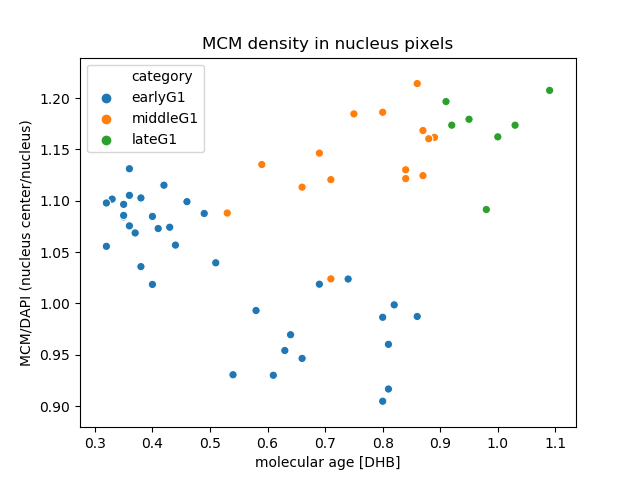

Text(0.5, 1.0, 'MCM density in nucleus pixels')

In [8]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (nucleus center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels")

<IPython.core.display.Javascript object>


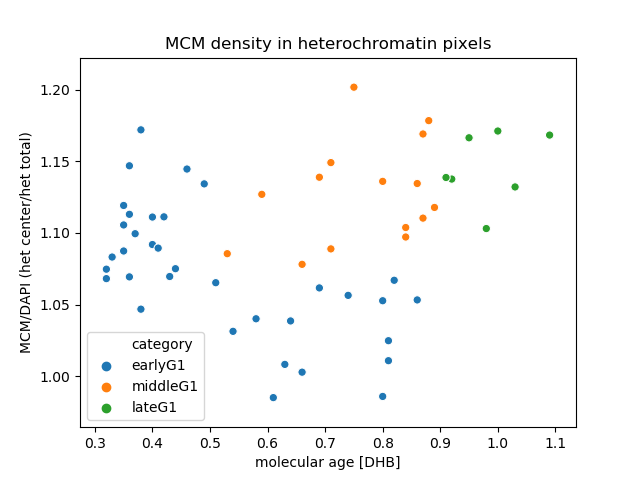

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [9]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het center/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


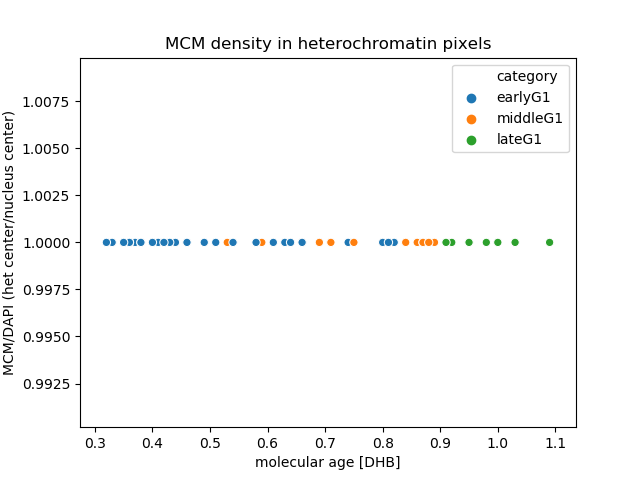

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [10]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus center)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


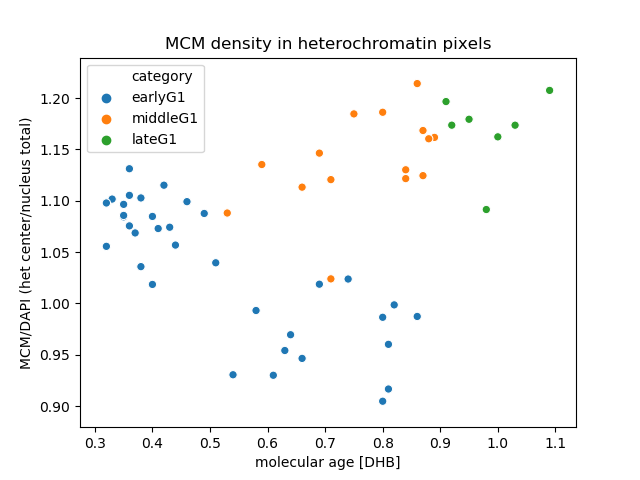

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [73]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

# outer (9x9 with 5 iterations)

<IPython.core.display.Javascript object>


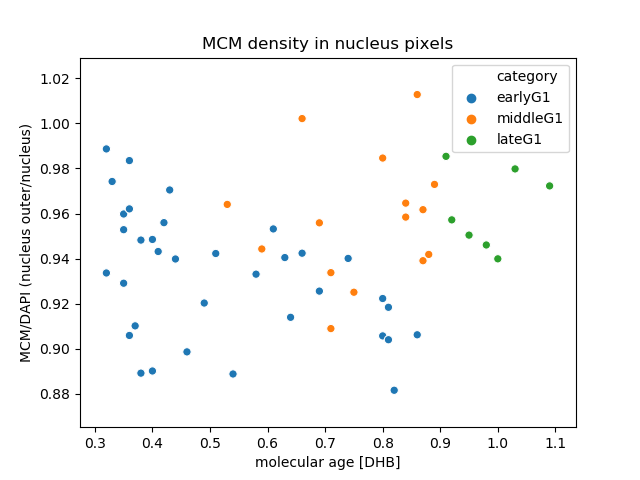

Text(0.5, 1.0, 'MCM density in nucleus pixels')

In [11]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu__erosion_outer_9x5_ch2/myDataSel.nucleus_Otsu__erosion_outer_9x5_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (nucleus outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels")

<IPython.core.display.Javascript object>


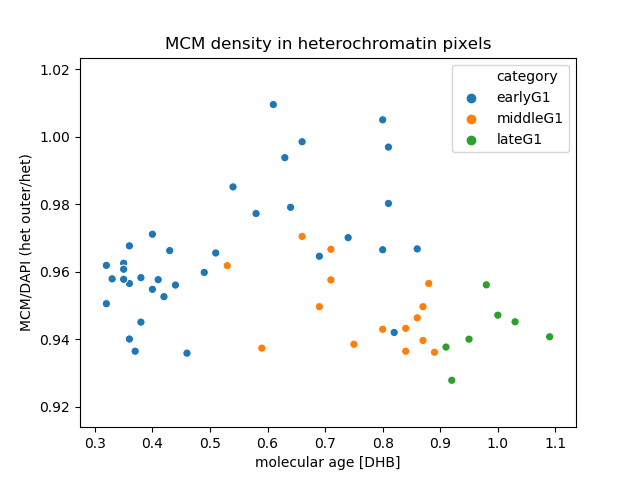

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [57]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


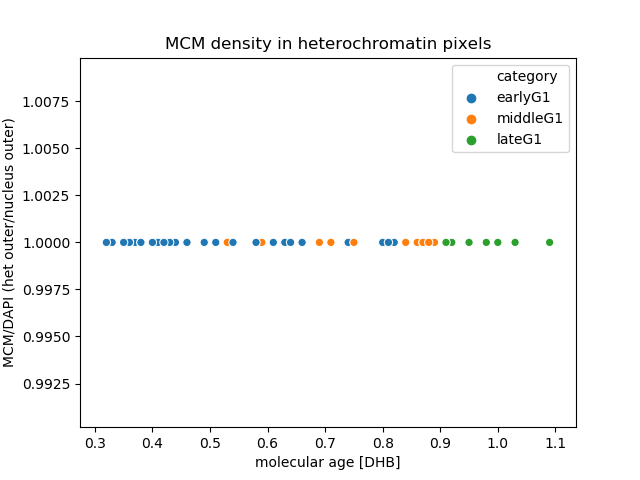

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [12]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu__erosion_outer_9x5_ch2/myDataSel.nucleus_Otsu__erosion_outer_9x5_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


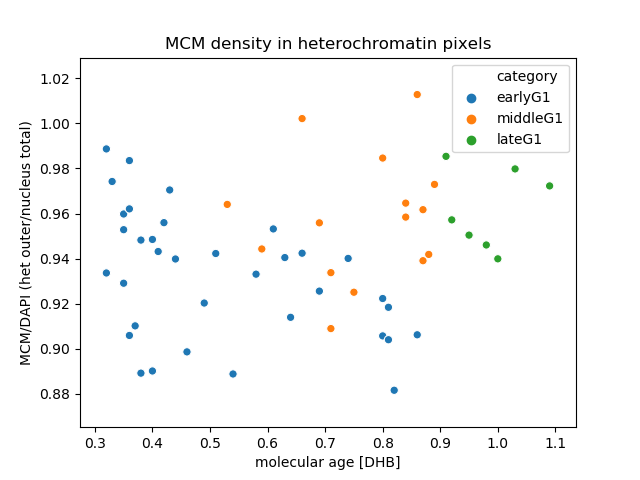

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [74]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

# inner (13 x 13 with 8 iterations)

<IPython.core.display.Javascript object>


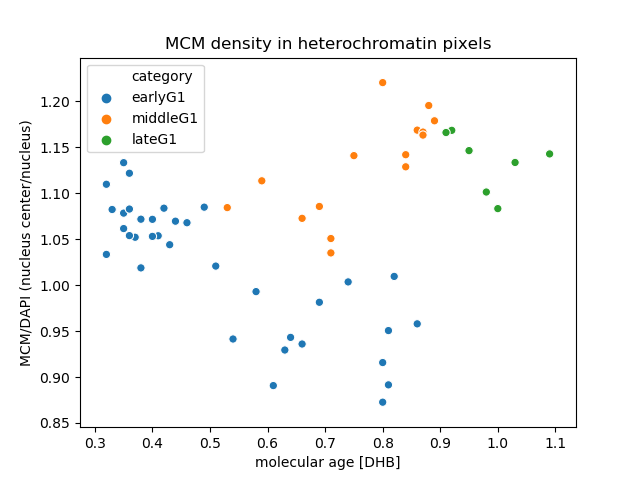

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [13]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_erosion_inner_13x8_ch2/myDataSel.nucleus_Otsu_erosion_inner_13x8_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (nucleus center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


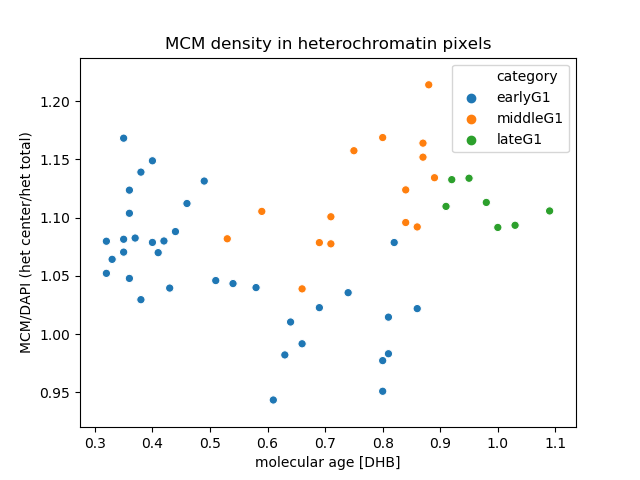

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [76]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_inner_13x8_20_ch2/myDataSel.HetChrom_erosion_inner_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het center/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


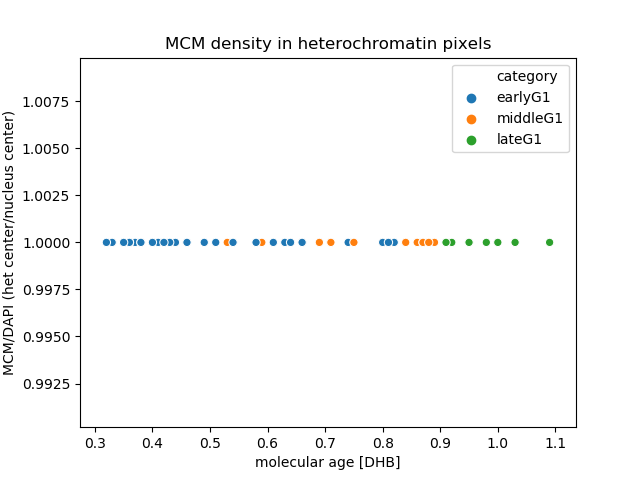

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [14]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_inner_13x8_ch2/myDataSel.nucleus_Otsu_erosion_inner_13x8_ch3)
center=(myDataSel.HetChrom_erosion_inner_13x8_20_ch2/myDataSel.HetChrom_erosion_inner_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus center)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


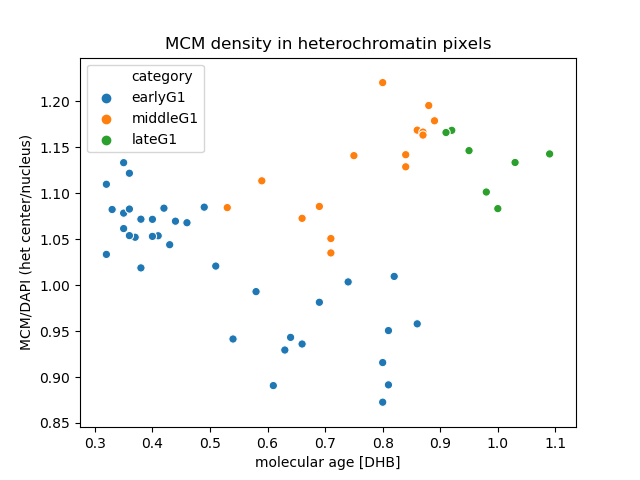

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [64]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_inner_13x8_20_ch2/myDataSel.HetChrom_erosion_inner_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

# outer (13x13 with 8 iterations)

<IPython.core.display.Javascript object>


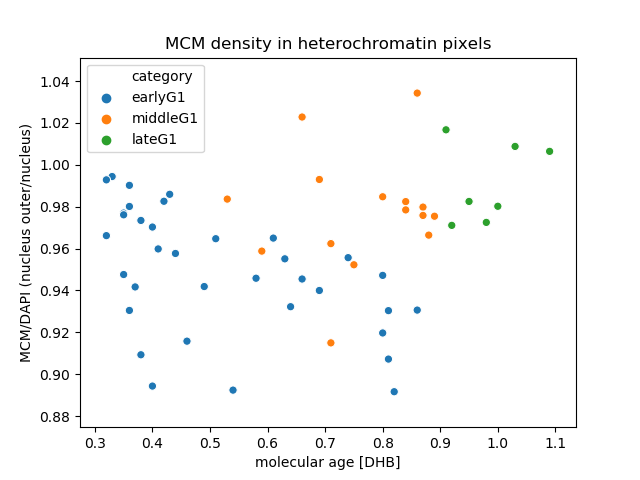

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [15]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu__erosion_outer_13x8_ch2/myDataSel.nucleus_Otsu__erosion_outer_13x8_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (nucleus outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


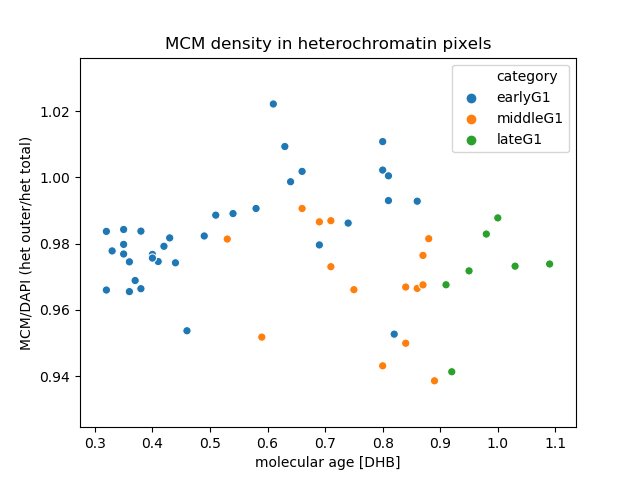

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [78]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_outer_13x8_20_ch2/myDataSel.HetChrom_erosion_outer_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


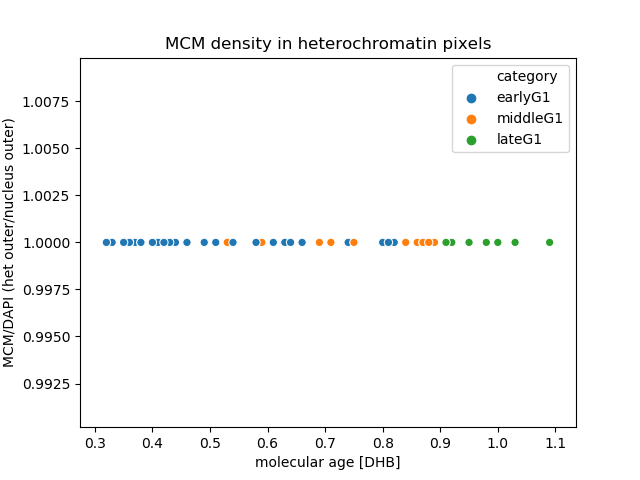

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [16]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu__erosion_outer_13x8_ch2/myDataSel.nucleus_Otsu__erosion_outer_13x8_ch3)
center=(myDataSel.HetChrom_erosion_outer_13x8_20_ch2/myDataSel.HetChrom_erosion_outer_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


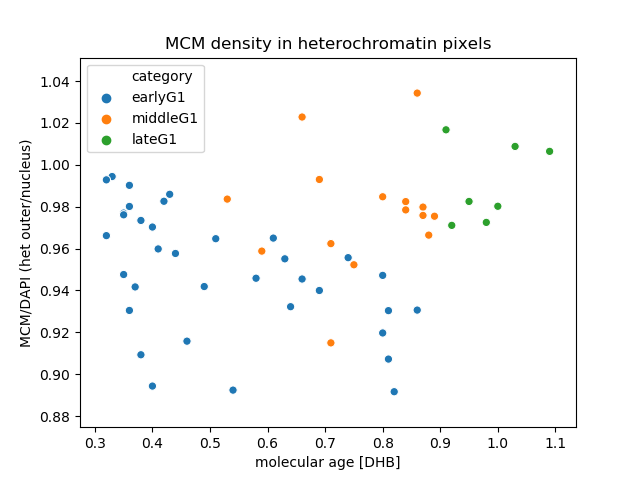

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [80]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_outer_13x8_20_ch2/myDataSel.HetChrom_erosion_outer_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecularAge_ratio', y = 'temp', data=myDataSel.loc[((myDataSel.day!='d20190625') & (myDataSel.day!='d201907012') &
                                                           ['G1' in x for x in myDataSel.category]),:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")